<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/da12_datatime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SPX 데이터 프레임

In [ ]:
# 파일이 저장된 github 주소
spx_csv = 'https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'

In [ ]:
spx = pd.read_csv(spx_csv)

In [ ]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [ ]:
spx.tail()

,Date,SPX
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66
5471,2011-10-14 00:00:00,1224.58


In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


In [ ]:
spx['year'] = spx['Date'].str[:4].astype('int')

In [ ]:
spx.head()

,Date,SPX,year
0,1990-02-01 00:00:00,328.79,1990
1,1990-02-02 00:00:00,330.92,1990
2,1990-02-05 00:00:00,331.85,1990
3,1990-02-06 00:00:00,329.66,1990
4,1990-02-07 00:00:00,333.75,1990


In [ ]:
spx['year_month'] = spx['Date'].str[:7]

In [ ]:
spx.head()

,Date,SPX,year,year_month
0,1990-02-01 00:00:00,328.79,1990,1990-02
1,1990-02-02 00:00:00,330.92,1990,1990-02
2,1990-02-05 00:00:00,331.85,1990,1990-02
3,1990-02-06 00:00:00,329.66,1990,1990-02
4,1990-02-07 00:00:00,333.75,1990,1990-02


In [ ]:
spx.groupby('year')['SPX'].mean()

year
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Name: SPX, dtype: float64

In [ ]:
spx.groupby('year_month')['SPX'].mean()

year_month
1990-02     330.452632
1990-03     338.465000
1990-04     338.178000
1990-05     350.250000
1990-06     360.386667
              ...     
2011-06    1287.288636
2011-07    1325.184500
2011-08    1185.305652
2011-09    1173.879048
2011-10    1171.356000
Name: SPX, Length: 261, dtype: float64

Date 컬럼의 데이터 타입이 문자열인 경우 주기별(연도별, 분기별, 월별, ...) 통계를 계산하기 위해서는 문자열을 파싱(parsing)해서 파생변수를 추가하고 groupby 연산을 수행해야 함.

날짜/시간을 표현하는 데이터인 경우 데이터 타입을 datetime 타입으로 변환하면, 주기별 통계를 보다 쉽게 수행할 수 있음.

In [ ]:
spx = pd.read_csv(spx_csv)

In [ ]:
# Date 컬럼의 타입(dtype)을 문자열(object)에서 날짜시간(datetime)으로 변환
spx['Date'] = pd.to_datetime(spx['Date'])

In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [ ]:
# Date 컬럼을 인덱스로 변환
# 날짜시간 타입에서 주기별(연도별, 분기별, ...) 통계를 계산하기 위해서는
# 인덱스가 날짜시간 타입 인덱스를 가져야 하기 때문에.
spx_with_index = spx.set_index('Date')

In [ ]:
spx_with_index

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [ ]:
spx_with_index.info()  #> DatetimeIndex를 갖는 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


In [ ]:
# 연도별 SPX 평균
spx_with_index.resample('Y')['SPX'].mean()

Date
1990-12-31     334.123506
1991-12-31     376.186324
1992-12-31     415.747008
1993-12-31     451.614822
1994-12-31     460.416508
1995-12-31     541.719087
1996-12-31     670.494843
1997-12-31     873.427787
1998-12-31    1085.503254
1999-12-31    1327.329563
2000-12-31    1427.221071
2001-12-31    1194.178992
2002-12-31     993.934802
2003-12-31     965.227540
2004-12-31    1130.649444
2005-12-31    1207.229444
2006-12-31    1310.461633
2007-12-31    1477.184343
2008-12-31    1220.042055
2009-12-31     948.046389
2010-12-31    1139.965516
2011-12-31    1276.093015
Freq: A-DEC, Name: SPX, dtype: float64

In [ ]:
# 분기별 SPX 평균
spx_with_index.resample('Q')['SPX'].mean()

Date
1990-03-31     334.751951
1990-06-30     349.796508
1990-09-30     335.881746
1990-12-31     316.562031
1991-03-31     352.282951
                 ...     
2010-12-31    1204.585625
2011-03-31    1302.529032
2011-06-30    1318.332857
2011-09-30    1225.268438
2011-12-31    1171.356000
Freq: Q-DEC, Name: SPX, Length: 88, dtype: float64

In [ ]:
# 월별 SPX 평균
spx_with_index.resample('M')['SPX'].mean()

Date
1990-02-28     330.452632
1990-03-31     338.465000
1990-04-30     338.178000
1990-05-31     350.250000
1990-06-30     360.386667
                 ...     
2011-06-30    1287.288636
2011-07-31    1325.184500
2011-08-31    1185.305652
2011-09-30    1173.879048
2011-10-31    1171.356000
Freq: M, Name: SPX, Length: 261, dtype: float64

In [ ]:
np.random.seed(1)
df = pd.DataFrame({'col_1': np.random.randint(100, size=5),
                   'col_2': np.random.randint(100, size=5),
                   'col_3': np.random.randint(100, size=5),})
df

,col_1,col_2,col_3
0,37,5,76
1,12,79,71
2,72,64,6
3,9,16,25
4,75,1,50


In [ ]:
# 컬럼 삭제: labels=컬럼이름, axis=1
df.drop(labels='col_1', axis=1)

,col_2,col_3
0,5,76
1,79,71
2,64,6
3,16,25
4,1,50


In [ ]:
# 컬럼 삭제: columns=컬럼이름 -> axis 파라미터 값은 자동으로 1로 설정.
df.drop(columns='col_1')

,col_2,col_3
0,5,76
1,79,71
2,64,6
3,16,25
4,1,50


In [ ]:
# 행 삭제: labels=행 인덱스(레이블), axis=0(기본값, 생략 가능)
df.drop(labels=0, axis=0)

,col_1,col_2,col_3
1,12,79,71
2,72,64,6
3,9,16,25
4,75,1,50


In [ ]:
# 행 삭제: index=행 인덱스(레이블) -> axis는 자동으로 1로 설정.
df.drop(index=0)

,col_1,col_2,col_3
1,12,79,71
2,72,64,6
3,9,16,25
4,75,1,50


In [ ]:
# 2개 이상의 컬럼(또는 행) 삭제
df.drop(columns=['col_1', 'col_2'])

,col_3
0,76
1,71
2,6
3,25
4,50


In [ ]:
df.drop(index=[2,4])

,col_1,col_2,col_3
0,37,5,76
1,12,79,71
3,9,16,25


In [ ]:
# read.csv() 함수의 parse_dates 파라미터: 날짜시간(datetime) 타입으로 분석할 칼럼 이름(들).
spx = pd.read_csv(spx_csv, parse_dates=['Date'])
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [ ]:
# read_csv() 함수의 index_col 파라미터: DateFrame에서 인덱스로 사용할 컬럼(들)의 리스트.
spx = pd.read_csv(spx_csv, parse_dates=['Date'], index_col=['Date'])
spx.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [ ]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


# Exercise

*   https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv 파일을 읽고 데이터 프레임 생성
*   날짜시간(datetime) 타입으로 변환할 수 있는 모든 컬럼들을의 데이터 타입을 변환.
*   연도별 파산한 은행 숫자를 찾고, 시각화
*   분기별 파산한 은행 숫자를 찾고, 시각화
    *   주기별 통계는 Closing Date를 기준으로.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## bank 데이터 프레임 생성

In [ ]:
bank_csv = 'https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv'

In [ ]:
bank = pd.read_csv(bank_csv)

In [ ]:
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


## 날짜시간(datetime) 타입으로 변환

In [ ]:
bank = pd.read_csv(bank_csv, parse_dates=['Closing Date', 'Updated Date'])

In [ ]:
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


## 연도별 파산한 은행 숫자를 찾고, 시각화

In [ ]:
bank_with_index = bank.set_index('Closing Date')
bank_with_index.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [ ]:
closing_bank_by_year = bank_with_index.resample('Y')['Bank Name'].count()
closing_bank_by_year

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, Name: Bank Name, dtype: int64

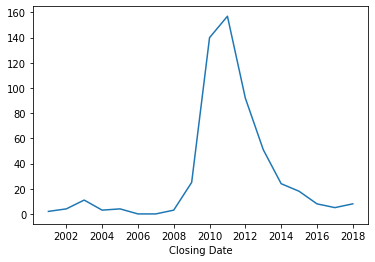

In [ ]:
sns.lineplot(x=closing_bank_by_year.index, y=closing_bank_by_year.values)
plt.show()

## 분기별 파산한 은행 숫자를 찾고, 시각화

In [ ]:
closing_bank_by_quarter = bank_with_index.resample('Q')['Bank Name'].count()
closing_bank_by_quarter

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Name: Bank Name, Length: 69, dtype: int64

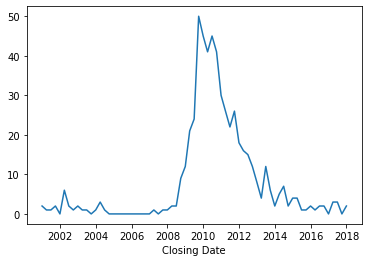

In [ ]:
sns.lineplot(x=closing_bank_by_quarter.index, y=closing_bank_by_quarter.values)
plt.show()

# 강사님 코드

In [ ]:
banklist_csv = 'https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv'

In [ ]:
banklist = pd.read_csv(banklist_csv)

In [ ]:
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [ ]:
banklist.tail()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
551,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05
554,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,13-Oct-00,17-Mar-05


In [ ]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [ ]:
banklist['Closing Date'] = pd.to_datetime(banklist['Closing Date'])

In [ ]:
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,5-Dec-17


In [ ]:
banklist['Updated Date'] = pd.to_datetime(banklist['Updated Date'])

In [ ]:
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [ ]:
banklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [ ]:
# 'Closing Date' 컬럼을 인덱스로 변환 -> resample을 하기 위해서.
banklist = banklist.set_index('Closing Date')

In [ ]:
banklist.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [ ]:
# 연도별 파산 은행 수
by_year = banklist.resample(rule='Y').size()

In [ ]:
by_year

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, dtype: int64

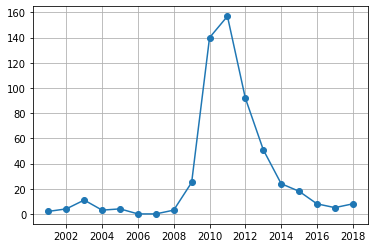

In [ ]:
plt.plot(by_year, marker='o')
plt.grid()
plt.show()

In [ ]:
by_quarter = banklist.resample(rule='Q').size()

In [ ]:
by_quarter

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Length: 69, dtype: int64

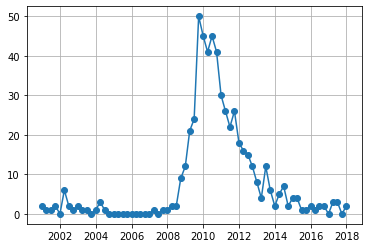

In [ ]:
plt.plot(by_quarter, marker='o')
plt.grid()
plt.show()

# Movielens 데이터 셋

In [ ]:
# 파일이 저장된 github 경로
ratings_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
col_names = ['user_id', 'movie_id', 'rating', 'ts']

In [ ]:
ratings = pd.read_csv(ratings_dat, sep='::', engine='python', names=col_names)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   ts        1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
# timestamp(정수)를 datetime으로 변환한 파생 변수(컬럼)
# unit 파라미터: 초(s), milli-second(ms), micro-second(us), nano-second(ns)
ratings['dt'] = pd.to_datetime(ratings['ts'], unit='s')
ratings.head()

,user_id,movie_id,rating,ts,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [ ]:
ratings['dt'].agg(['min', 'max'])

min   2000-04-25 23:05:32
max   2003-02-28 17:49:50
Name: dt, dtype: datetime64[ns]

In [ ]:
ratings.set_index('dt').resample('Y').size()

dt
2000-12-31    904757
2001-12-31     68058
2002-12-31     24046
2003-12-31      3348
Freq: A-DEC, dtype: int64